# **LDA**

## **Download required libraries**

In [ ]:
!pip install gensim
!pip install pyLDAvis
!pip install whatthelang
!pip install git+https://github.com/andrianllmm/tagalog-stemmer.git@main

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 786.9/786.9 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.7/244.7 kB 20.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
Using cached cysignals-1.11.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.1 MB)
  Created wheel for whatthelang: filename=whatthelang-1.0.1-py3-none-any.whl size=789800 sha256=77baff490b9c84e96d319bbd1fa15c3b5a07ee8535f7dd2dfeed33a6f3f073c9
  Stored in directory: /root/.cache/pip/wheels/e0/f7/2e/238a9063d3acf4bbbf069443e79285ce65fc1ffb1e81380114
  Created wheel for pyfasttext: filename=pyfasttext-0.4.6-cp310-cp310-linux_x86_64.whl size=2033634 sha256=39b900e92c1ddef03768cb8321a1af0a418ecbadb513c34669fc8e9e99502edf
  Stored in directory: /root/.cache/pip/wheels/a1/1e/10/0df99679118ea1dfa664f0b4fd2b906344f885e278563ae341
Successfully built whatthelang 

## **Download stopwords from nltk**

## **Import required libraries**

In [ ]:
import numpy as np
import pandas as pd

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

#nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download("stopwords")
nltk.download("wordnet")

# vis
import pyLDAvis
import pyLDAvis.gensim

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


## **Data preprocessing**

In [ ]:
import re
from whatthelang import WhatTheLang

wtl = WhatTheLang()

# Function to classify content as 'English' or 'Taglish'
def classify_language(text):
    predicted_lang = wtl.predict_lang(text)
    if predicted_lang == 'en':
        return 'English'
    elif predicted_lang == 'tl':
        return 'Taglish'
    else:
        return 'Taglish'  # Default to Taglish

# Function to remove emojis
def remove_emojis(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F700-\U0001F77F"  # alchemical symbols
                           u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                           u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                           u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                           u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                           u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                           u"\U00002702-\U000027B0"  # Dingbats
                           u"\U000024C2-\U0001F251"  # Enclosed characters
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

# Load the dataset
df = pd.read_csv("AI in edu dataset - Sheet1.csv")

# Remove null values
df = df.dropna(subset=['Content'])

# Remove all columns except content
df = df.drop(columns=['Platform', 'Sentiment'])

# Remove newlines from content
df = df.map(lambda x: re.sub(r'\n', '', x))

# Remove punctuation
df = df.map(lambda x: re.sub('[,\.!?]', '', x))

# Convert to lowercase
df = df.map(lambda x: x.lower())

# Remove emojis
df = df.map(lambda x: remove_emojis(x))

# Apply the classification to the 'Content' column
df['Predicted_Language'] = df['Content'].map(classify_language)

english_df = df[df['Predicted_Language'] == 'English']
taglish_df = df[df['Predicted_Language'] == 'Taglish']

# Count the number of English and Taglish texts
language_counts = df['Predicted_Language'].value_counts()

# Print the number of English and Taglish texts
print("Language Count:")
print(language_counts)

# Remove all columns except content since it is not needed anymore
english_df = english_df.drop(columns='Predicted_Language')
taglish_df = taglish_df.drop(columns='Predicted_Language')

# Display the first few rows of the preprocessed data
print(english_df.head())
print(taglish_df.head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:46: DeprecationWarning: invalid escape sequence '\.'
<>:46: DeprecationWarning: invalid escape sequence '\.'
<ipython-input-5-f8a65bec8e79>:46: DeprecationWarning: invalid escape sequence '\.'
  df = df.map(lambda x: re.sub('[,\.!?]', '', x))


Language Count:
Predicted_Language
English    324
Taglish    188
Name: count, dtype: int64
                                             Content
0  the education system that ai will destroy will...
1  ai tool sare very helpful but you need to use ...
2  ai and teachers should join forces in a collab...
3  kids that learn how to use the ai will realize...
4  but here’s the thing if we embrace the ai how ...
                                               Content
236  ok sya nagbibigay ng idea at pang research mas...
237  kung aasa kayo sa ai to do school work kayo di...
239  nakakadismaya panahon ngayon mga kabataan ngay...
240  para sa akin i like ai to be a mainstream thin...
242  sobrang dali ng matuto ng students ngayon kami...


## **Data Exploration**

### **Using a Wordcloud to get the most common words in the data**


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


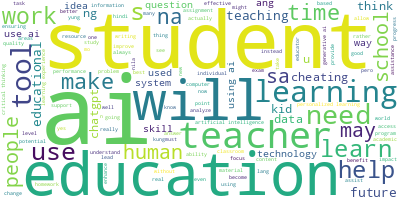

In [ ]:
# ENGLISH WORDCLOUD
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(english_df['Content'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud for English
wordcloud.to_image()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


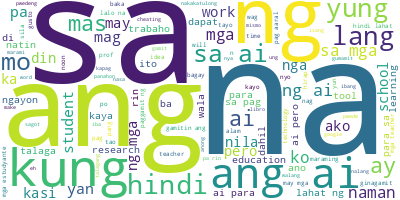

In [ ]:
# TAGLISH WORDCLOUD
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(taglish_df['Content'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud for English
wordcloud.to_image()

## **Data Preparation for LDA**

### **Lemmatization and removal of stopwords**

In [ ]:
from tglstemmer import stemmer

lemmatizer = WordNetLemmatizer()

english_stop_words = set(stopwords.words('english'))
tagalog_stop_words = set()
with open('tagalog_stop_words.txt', 'r') as file:
  for line in file:
    tagalog_stop_words.add(line.strip())

# Combine English and Tagalog stop words into one set
combined_stop_words = english_stop_words.union(tagalog_stop_words)

# Function to process each document (tokenization, stopword removal, lemmatization, stemming)
def preprocess_doc(document):
    tokens = gensim.utils.simple_preprocess(str(document), deacc=True)  # Tokenization
    tokens = [token for token in tokens if token not in combined_stop_words]  # Stopword removal
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in combined_stop_words and token not in ['english', 'taglish']]
    stemmed_tokens = [stemmer.get_stem(token) for token in tokens]  # Use stemmer for stemming
    return stemmed_tokens

# Convert the DataFrame content into a list of documents
data = df.values.tolist()

processed_data = [preprocess_doc(doc) for doc in data]

# Display the first 5 processed documents
for doc in processed_data[:5]:
    print(doc)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['education', 'system', 'ai', 'destroy', 'system', 'adapt', 'change', 'world', 'ai']
['ai', 'tool', 'sare', 'helpful', 'need', 'use', 'properly', 'going', 'replace', 'hom', 'still', 'need', 'hom', 'touch']
['ai', 'teacher', 'join', 'force', 'collaborative', 'effort', 'revolutionize', 'education', 'ai', 'teacher', 'empower', 'student', 'best']
['kid', 'learn', 'use', 'ai', 'realize', 'career', 'obsolete', 'ai', 'take', 'smarter', 'path']
['thing', 'embrace', 'ai', 'student', 'ever', 'learn', 'form', 'opinion', 'ask', 'ai', 'form']


## **Dictionary and corpus creation**

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(processed_data)

# Create Corpus
corpus = [id2word.doc2bow(text) for text in processed_data]

# Display Results
print(corpus[:1][0][:15])

[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 2), (6, 1)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## **LDA Model Training**

### **Single-core training**


In [ ]:
from gensim.models import LdaModel

lda_model = LdaModel(corpus, num_topics=3, id2word=id2word, passes=10, alpha='auto', eta='auto')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## **Display Topics**

In [ ]:
num_topics = lda_model.num_topics

# Print each topic with its top words in column format
for topic_id in range(num_topics):
    topic_terms = lda_model.show_topic(topic_id, topn=10)  # Get top 10 words for each topic
    words = [f"{word}" for word, weight in topic_terms]
    weights = [f"({round(weight, 4)})" for word, weight in topic_terms]

    print(f"Topic #{topic_id}:")

    # Print each word and its weight in two columns
    for word, weight in zip(words, weights):
        print(f"{word:<15} {weight:<10}")  # Adjust <15 and <10 for column width if needed

    print()

Topic #0:
ai              (0.03999999910593033)
student         (0.017999999225139618)
education       (0.00860000029206276)
work            (0.00860000029206276)
learning        (0.007699999958276749)
tool            (0.005900000222027302)
need            (0.00559999980032444)
use             (0.005100000184029341)
learn           (0.004999999888241291)
aral            (0.004399999976158142)

Topic #1:
ai              (0.052299998700618744)
student         (0.026900000870227814)
education       (0.014700000174343586)
learning        (0.013500000350177288)
teacher         (0.0066999997943639755)
gamit           (0.006599999964237213)
help            (0.006399999838322401)
technology      (0.006000000052154064)
tool            (0.00570000009611249)
educational     (0.00430000014603138)

Topic #2:
ai              (0.052000001072883606)
teacher         (0.01679999940097332)
student         (0.013799999840557575)
use             (0.00989999994635582)
gamit           (0.009399999864399433)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=id2word)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.066883 -0.050102       1        1  37.798673
2     -0.080757 -0.028065       2        1  31.352949
0      0.013874  0.078167       3        1  30.848379, topic_info=          Term       Freq      Total Category  logprob  loglift
26     teacher  76.000000  76.000000  Default  30.0000  30.0000
17         use  46.000000  46.000000  Default  29.0000  29.0000
51        work  44.000000  44.000000  Default  28.0000  28.0000
802   research  16.000000  16.000000  Default  27.0000  27.0000
280    provide  12.000000  12.000000  Default  26.0000  26.0000
...        ...        ...        ...      ...      ...      ...
1617       man   8.262816  29.581689   Topic3  -5.7891  -0.0993
112      using   8.184741  28.710351   Topic3  -5.7986  -0.0789
26     teacher   8.447076  76.538476   Topic3  -5.7670  -1.0279
159       help   7.504054  32.301816   Topic3  -5.8854  -0.2836
108   cheating   7.368617  22.552178   Topic3  -5.9036   0.0575

[242 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
167       1  0.683444  ability
167       2  0.292905  ability
195       1  0.732911   access
195       2  0.133257   access
195       3  0.133257   access
...     ...       ...      ...
51        3  0.515301     work
652       3  0.865379  working
132       1  0.236135    would
132       2  0.708406    would
653       3  0.778489    wrong

[329 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1])

## **Coherence Score**

In [ ]:
from gensim.models.coherencemodel import CoherenceModel

# Coherence
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_data, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score:', coherence_lda)

# Perplexity
perplexity = lda_model.log_perplexity(corpus)
print(f'Perplexity: {perplexity}')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Coherence Score: 0.42678561207755394
Perplexity: -7.105114188240659


# **LSA**

In [ ]:
# This command installs a Python package directly from a GitHub repository.
# It uses pip to install the Tagalog Stemmer package from the repository hosted at the given URL.
!pip install git+https://github.com/andrianllmm/tagalog-stemmer.git@main
!pip install langdetect
!pip install googletrans==4.0.0-rc1


  Cloning https://github.com/andrianllmm/tagalog-stemmer.git (to revision main) to /tmp/pip-req-build-ucgrl_5z
  Running command git clone --filter=blob:none --quiet https://github.com/andrianllmm/tagalog-stemmer.git /tmp/pip-req-build-ucgrl_5z
  Resolved https://github.com/andrianllmm/tagalog-stemmer.git to commit b5babfd4caebf8a8f480f8adab9f1c97f42a3baa
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for tglstemmer: filename=tglstemmer-0.0.1-py3-none-any.whl size=146663 sha256=dc5bcc9a5517656c9df7a380eceef84afdd73d7104232642b91030470e3861f6
  Stored in directory: /tmp/pip-ephem-wheel-cache-75nfdcnh/wheels/8b/a1/58/0ac74f560df0e1894833f3d6d2b6efcf76b8cf603ebd847cf4
Successfully built tglstemmer
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 12.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-a

In [ ]:
# Importing necessary libraries
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis

# Importing visualization libraries
import matplotlib.pyplot as plt  # For plotting and data visualization
from matplotlib import style  # For setting plot styles
import seaborn as sns  # For advanced data visualization (heatmaps, categorical plots)

# Importing Natural Language Toolkit (nltk) for NLP operations
import nltk
nltk.download('punkt')  # Downloading 'punkt' tokenizer for sentence and word tokenization

# Importing functions from nltk for stopwords and tokenization
from nltk.corpus import stopwords  # For using stopwords (commonly removed words like 'and', 'the')
from nltk.tokenize import word_tokenize, sent_tokenize  # Functions for word and sentence tokenization

# Importing stemmers (for reducing words to their root form)
from nltk.stem import PorterStemmer, LancasterStemmer  # Porter and Lancaster stemming algorithms

# Importing WordNet lemmatizer (for converting words to their base form using linguistic rules)
from nltk.stem import WordNetLemmatizer

# Importing Tagalog stemmer from the 'tglstemmer' package (assumed installed in earlier command)
from tglstemmer import stemmer  # Tagalog language stemmer
nltk.download('stopwords')
# Importing vectorizers from scikit-learn for creating document-term matrices (DTM)
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer  # TF-IDF and Count vectorization

# Defining a set of stop words for use in text processing
stop_words = set(nltk.corpus.stopwords.words('english'))  # Stop words in English

# Downloading 'wordnet' corpus for lemmatization
nltk.download('wordnet')
#Downloading 'stopwords'

# Importing regular expression library for text manipulation and pattern matching
import re  # For regex operations such as cleaning text data

from langdetect import detect

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Reading Tagalog stopwords from a text file
# 'tagalog_stop_words.txt' is assumed to be a file containing a list of stopwords in Tagalog.
# The file is read as a DataFrame using pandas.
tagalog_stopwords = pd.read_csv("tagalog_stop_words.txt")

# Extracting the 'stopwords' column from the DataFrame and converting it to a Python list
# Assuming the file has a column named 'stopwords' that contains the actual stop words.
tagalog_stopwords = tagalog_stopwords['stopwords'].tolist()

# Output the list of Tagalog stopwords
tagalog_stopwords


['ako',
 'sa',
 'akin',
 'ko',
 'aking',
 'sarili',
 'kami',
 'atin',
 'ang',
 'aming',
 'amin',
 'ating',
 'ka',
 'iyong',
 'iyo',
 'inyong',
 'siya',
 'kanya',
 'mismo',
 'ito',
 'nito',
 'kanyang',
 'sila',
 'nila',
 'kanila',
 'kanilang',
 'kung',
 'ano',
 'alin',
 'sino',
 'kanino',
 'na',
 'mga',
 'iyon',
 'am',
 'ay',
 'maging',
 'naging',
 'mayroon',
 'may',
 'nagkaroon',
 'pagkakaroon',
 'gumawa',
 'ginagawa',
 'ginawa',
 'paggawa',
 'ibig',
 'dapat',
 'maaari',
 'marapat',
 'kong',
 'ikaw',
 'tayo',
 'hindi',
 'namin',
 'gusto',
 'nais',
 'niyang',
 'nilang',
 'niya',
 'huwag',
 'ginawang',
 'gagawin',
 'maaaring',
 'sabihin',
 'narito',
 'kapag',
 'ni',
 'nasaan',
 'bakit',
 'paano',
 'kailangan',
 'walang',
 'katiyakan',
 'isang',
 'at',
 'pero',
 'o',
 'dahil',
 'bilang',
 'hanggang',
 'habang',
 'ng',
 'pamamagitan',
 'para',
 'tungkol',
 'laban',
 'pagitan',
 'panahon',
 'bago',
 'pagkatapos',
 'itaas',
 'ibaba',
 'mula',
 'pataas',
 'pababa',
 'palabas',
 'ibabaw',
 'il

In [ ]:
# Combining English and Tagalog stopwords into a single list
# The stopwords from nltk (in English) are combined with the Tagalog stopwords previously loaded from a file.
# This allows you to remove both English and Tagalog stopwords from text in one step.
all_stopwords = stopwords.words('english') + tagalog_stopwords

# The resulting 'all_stopwords' will contain stopwords from both languages.


In [ ]:
# Reading the English dataset from a CSV file
# 'AI in edu dataset - Sheet1.csv' is assumed to contain text data in English.
# The dataset is loaded as a pandas DataFrame.
dataset = pd.read_csv('AI in edu dataset - Sheet1.csv')

# Converting all data in the dataset to string type
# Ensures that all values in the DataFrame are treated as text, regardless of their original format.
dataset = dataset.astype(str)

In [ ]:
def clean_text(text):

    #Determine the language of the sentence
    lang = detect(text)


    # Remove any character that is not a letter or whitespace using regex
    # This step removes punctuation, numbers, and special characters, leaving only letters and spaces.
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Initialize the WordNet Lemmatizer (for reducing words to their base form)
    le = WordNetLemmatizer()

    # Tokenize the text into individual words
    word_tokens = word_tokenize(text)

    # Lemmatize each word token and remove stopwords (words in 'all_stopwords') and tokens shorter than 3 characters
    tokens = [le.lemmatize(w) for w in word_tokens if w not in all_stopwords and len(w) > 3]

    # Stemming based on language
    if lang == 'en':
        # For other languages (assumed to be English), use the PorterStemmer for stemming
        ps = PorterStemmer()
        stemmed_tokens = [ps.stem(token) for token in tokens]

    else:
        # If the language is English, use the Tagalog stemmer ('stemmer' assumed to be the English stemmer)
        stemmed_tokens = [stemmer.get_stem(token) for token in tokens]

    # Join the processed tokens back into a single string
    cleaned_text = " ".join(stemmed_tokens)

    # Return the cleaned and processed text
    return cleaned_text


In [ ]:
# Applying the 'clean_text' function to the 'Content' column of the dataset
# For each row in the 'Content' column, it calls the 'clean_text' function, specifying "english" as the language.
dataset['Content'] = dataset['Content'].apply(lambda x: clean_text(x))


In [ ]:
# Initializing the TfidfVectorizer
# This vectorizer converts the text into a matrix of TF-IDF features.
# 'stop_words=all_stopwords' specifies that the TF-IDF vectorizer should ignore both English and Tagalog stopwords.
# 'max_features=1000' limits the number of features (terms) to 1000, keeping only the most important ones based on TF-IDF scores.
vect = TfidfVectorizer(stop_words=all_stopwords, max_features=1000)

# Applying the vectorizer to the 'Content' column of the English dataset
# The fit_transform method learns the vocabulary and creates the document-term matrix (DTM) based on TF-IDF scores.
vect_text = vect.fit_transform(dataset['Content'])


In [ ]:
# Printing the shape of the TF-IDF matrix
# This will show the dimensions of the matrix, where the first number is the number of documents and the second number is the number of features (terms).
print(vect_text.shape)

# Printing the TF-IDF matrix
# This will display the sparse matrix representation of the TF-IDF features.
# Each row corresponds to a document, and each column corresponds to a term, with values representing the TF-IDF scores.
print(vect_text)


(452, 1000)
  (0, 988)	0.3661512276219711
  (0, 139)	0.3872600401067019
  (0, 13)	0.3661512276219711
  (0, 223)	0.405213305927521
  (0, 875)	0.6146936993672553
  (0, 242)	0.19962477555626815
  (1, 933)	0.3311073047776221
  (1, 849)	0.29876770907218103
  (1, 101)	0.34773214295296606
  (1, 379)	0.47056016827290614
  (1, 777)	0.28424451801723805
  (1, 348)	0.2781558469090454
  (1, 720)	0.29876770907218103
  (1, 539)	0.3799333823310503
  (1, 369)	0.186315650255668
  (1, 927)	0.1796402844979032
  (2, 109)	0.361741833465506
  (2, 860)	0.15834519020375185
  (2, 253)	0.40497041595597705
  (2, 787)	0.40497041595597705
  (2, 248)	0.39156163530769367
  (2, 153)	0.39156163530769367
  (2, 891)	0.41967716659623233
  (2, 242)	0.18247635027401554
  (3, 607)	0.48036692722516855
  :	:
  (446, 55)	0.4883229457565258
  (446, 649)	0.5684266119582732
  (447, 306)	0.541769651448546
  (447, 212)	0.4641948178479465
  (447, 863)	0.47357220679812106
  (447, 458)	0.2573914219662607
  (447, 13)	0.4477586813217323


In [ ]:
# Extracting the IDF (Inverse Document Frequency) values from the fitted TF-IDF vectorizer
# 'idf_' is an attribute of the TfidfVectorizer object that contains the IDF values for each term in the vocabulary.
idf = vect.idf_

# Creating a dictionary that maps each term to its IDF score
# 'vect.get_feature_names_out()' provides the list of feature names (terms).
# 'idf' contains the IDF scores corresponding to these terms.
dd = dict(zip(vect.get_feature_names_out(), idf))

# Sorting the dictionary by IDF scores in ascending order
# This gives the terms with the lowest IDF scores (i.e., most common across documents) first.
l = sorted(dd, key=dd.get)

In [ ]:
# Importing the TruncatedSVD class from scikit-learn
# TruncatedSVD is used for dimensionality reduction, particularly for reducing the dimensions of TF-IDF matrices in topic modeling.
from sklearn.decomposition import TruncatedSVD

# Initializing the TruncatedSVD model
# 'n_components=10' specifies that the dimensionality of the data will be reduced to 10 components (topics).
# 'algorithm='randomized'' indicates the use of randomized SVD, which is more efficient for large datasets.
# 'n_iter=10' specifies the number of iterations for the randomized algorithm.
# 'random_state=42' ensures reproducibility by setting the seed for the random number generator.
lsa_model = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=10, random_state=100)

# Applying the TruncatedSVD model to the TF-IDF matrix to reduce its dimensionality
# 'lsa_top' will contain the transformed data with reduced dimensions (10 components).
lsa_top = lsa_model.fit_transform(vect_text)


In [ ]:
# Printing the transformed data obtained from applying TruncatedSVD
# 'lsa_top' contains the data projected onto the reduced-dimensional space (10 components).
print(lsa_top)

# Printing the shape of the transformed data
# This will show the dimensions of the reduced data, where the first number is the number of documents
# and the second number is the number of components (10 in this case).
print(lsa_top.shape)


[[ 0.16641704 -0.03896213  0.34447752 ...  0.01896209 -0.01678566
   0.02705619]
 [ 0.19266245 -0.01220771  0.00659847 ... -0.00641824  0.14529952
   0.0567431 ]
 [ 0.26655515  0.13045884  0.08631572 ...  0.06591135 -0.07353376
  -0.03213371]
 ...
 [ 0.09802933 -0.041261   -0.07608876 ... -0.10411753  0.00992074
  -0.09540792]
 [ 0.21250829 -0.057944    0.00601371 ... -0.00312432 -0.00905183
   0.10760025]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]
(452, 10)


In [ ]:
# Extracting the representation of the first document in the reduced-dimensional space
# 'lsa_top[0]' gets the vector of the first document across the 10 components (topics).
l = lsa_top[0]

# Iterating over each topic and its score for the first document
# 'enumerate(l)' provides both the index (i.e., topic number) and the score for each topic.
for i, topic in enumerate(l):
    # Printing the topic number and its score multiplied by 100 for better readability
    print("Topic ", i, " : ", topic * 100)


Topic  0  :  16.641704495609964
Topic  1  :  -3.8962129512032595
Topic  2  :  34.44775230477068
Topic  3  :  14.381069059261481
Topic  4  :  2.576324968102788
Topic  5  :  -8.278246177961398
Topic  6  :  -6.299684838522913
Topic  7  :  1.8962087888286807
Topic  8  :  -1.6785658389997304
Topic  9  :  2.7056187586321294


In [ ]:
# Printing the shape of the components matrix from the TruncatedSVD model
# 'lsa_model.components_' contains the matrix of the topic-term distributions.
# The shape will be (n_components, n_features), where:
# - n_components is the number of topics (10 in this case)
# - n_features is the number of terms (features) in the TF-IDF matrix (e.g., 1000 if 'max_features=1000')
print(lsa_model.components_.shape)

# Printing the components matrix
# 'lsa_model.components_' is a matrix where each row represents a topic
# and each column represents the importance of a term in that topic.
print(lsa_model.components_)


(10, 1000)
[[ 0.02650253  0.01542948  0.00247789 ...  0.01670036  0.002947
   0.002064  ]
 [-0.00588689 -0.00486634  0.01551591 ...  0.00900716  0.00059951
   0.00045666]
 [ 0.00967039  0.00033556 -0.00138877 ...  0.03171788  0.00176783
   0.00328645]
 ...
 [ 0.01135764  0.01756077  0.00248393 ... -0.01667807 -0.01546344
  -0.00392538]
 [ 0.01233579  0.00696552 -0.00518001 ... -0.00168141 -0.00291981
   0.0019874 ]
 [ 0.00726726  0.01445285  0.00138345 ... -0.03367793  0.01240584
  -0.00103268]]


In [ ]:
# Getting the feature names (terms) from the TF-IDF vectorizer
# 'vocab' will be a list of all terms (features) used in the TF-IDF matrix.
vocab = vect.get_feature_names_out()

# Iterating over each topic (component) in the LSA model
for i, comp in enumerate(lsa_model.components_):
    # Pairing each term with its weight for the current topic
    vocab_comp = zip(vocab, comp)

    # Sorting terms by their weight for the current topic in descending order
    # 'sorted_words' contains the top 10 terms with the highest weights for the topic.
    sorted_words = sorted(vocab_comp, key=lambda x: x[1], reverse=True)[:10]

    # Printing the most important words for the current topic
    print("Topic " + str(i) + ": ")
    for t in sorted_words:
        print(t[0], end=" ")  # Printing term names
    print("\n")  # Newline for readability

Topic 0: 
student learn educ teacher help person need tool use provid 

Topic 1: 
gamit teacher tulong estudyante pwedeng pwede man baka aral talaga 

Topic 2: 
educ system technolog school teach task chang philippin qualiti access 

Topic 3: 
tulong estudyante educ learn aral system lesson bilis intindi person 

Topic 4: 
chatgpt think work use cheat tool skill school critic depend 

Topic 5: 
tulong estudyante lesson think pwedeng task teacher creativ critic intindi 

Topic 6: 
think critic creativ lack skill learn lead gamit develop human 

Topic 7: 
student access education tool technolog critic think lack pilipinas lead 

Topic 8: 
pwedeng school public need pilipinas work task depende subok technolog 

Topic 9: 
education help grade improv ilang autom task tutor focu philippin 



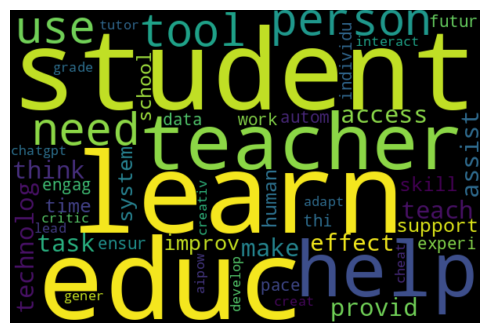

In [ ]:
from wordcloud import WordCloud  # Importing WordCloud for visualizing term importance

# Function to generate and display a word cloud for a given topic
def draw_word_cloud(index):
    # Initialize an empty string to hold the important words for the topic
    imp_words_topic = ""

    # Retrieve the component (topic-term distribution) for the given index (topic)
    comp = lsa_model.components_[index]

    # Pair each term with its weight for the topic
    vocab_comp = zip(vocab, comp)

    # Sort terms by their weight in descending order and select the top 50 terms
    sorted_words = sorted(vocab_comp, key=lambda x: x[1], reverse=True)[:50]

    # Concatenate the top 50 terms into a single string, separated by spaces
    for word in sorted_words:
        imp_words_topic += " " + word[0]

    # Generate a word cloud image from the concatenated terms
    wordcloud = WordCloud(width=600, height=400).generate(imp_words_topic)

    # Plot the word cloud
    plt.figure(figsize=(5, 5))
    plt.imshow(wordcloud, interpolation='bilinear')  # Display the word cloud
    plt.axis("off")  # Hide the axis
    plt.tight_layout()  # Adjust layout to fit elements
    plt.show()  # Display the plot

# Generate and display the word cloud for Topic 0
draw_word_cloud(0)


In [ ]:
# Getting the feature names (terms) from the TF-IDF vectorizer
terms = vect.get_feature_names_out()

# Initializing a list to store the most important terms for each topic
topics = []

# Iterating over each topic (component) in the LSA model
for topic_idx, topic in enumerate(lsa_model.components_):
    # Sorting the terms based on their importance (weight) for the current topic
    # 'topic.argsort()' returns indices that would sort the topic weights array
    # '[:-11:-1]' selects the top 10 terms with the highest weights
    # 'topics' will contain lists of the most important terms for each topic
    topics.append([terms[i] for i in topic.argsort()[:-11:-1]])

# 'topics' now contains lists of the top 10 terms for each topic


In [ ]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary

# Preprocessing the documents from the Taglish dataset
# Splitting each document into a list of words
processed_docs = [doc.split() for doc in dataset['Content']]

# Creating a dictionary from the processed documents
# This dictionary maps each word to a unique id, which is used in coherence calculation
dictionary = Dictionary(processed_docs)

# Initializing the CoherenceModel with the following parameters:
# - topics: the list of topics where each topic is a list of top terms
# - texts: the preprocessed documents used for coherence calculation
# - dictionary: the dictionary mapping terms to IDs
# - coherence: the coherence measure to use, 'c_v' in this case
coherence_model_lsa = CoherenceModel(topics=topics, texts=processed_docs, dictionary=dictionary, coherence='c_v')

# Calculating the coherence score for the topics
# The coherence score measures how coherent the topics are, with higher values indicating better coherence
coherence_lsa = coherence_model_lsa.get_coherence()

# Output the coherence score
print("Coherence Score: ", coherence_lsa)


Coherence Score:  0.41398303757516225


In [ ]:
##Cosine Similarity
cosine_sim = cosine_similarity(lsa_top)
print(f'Cosine Similarity : {cosine_sim.mean()}')

# **Machine Based**

In [ ]:
# This command installs a Python package directly from a GitHub repository.
# It uses pip to install the Tagalog Stemmer package from the repository hosted at the given URL.
!pip install git+https://github.com/andrianllmm/tagalog-stemmer.git@main
!pip install langdetect
!pip install googletrans==4.0.0-rc1


  Cloning https://github.com/andrianllmm/tagalog-stemmer.git (to revision main) to c:\users\my pc\appdata\local\temp\pip-req-build-761b9fmo
  Resolved https://github.com/andrianllmm/tagalog-stemmer.git to commit b5babfd4caebf8a8f480f8adab9f1c97f42a3baa
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'


DEPRECATION: Loading egg at c:\users\my pc\appdata\roaming\python\python311\site-packages\fonttools-4.51.0-py3.11-win-amd64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\my pc\appdata\roaming\python\python311\site-packages\gluoncv-0.11.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
  Running command git clone --filter=blob:none --quiet https://github.com/andrianllmm/tagalog-stemmer.git 'C:\Users\MY PC\AppData\Local\Temp\pip-req-build-761b9fmo'


DEPRECATION: Loading egg at c:\users\my pc\appdata\roaming\python\python311\site-packages\fonttools-4.51.0-py3.11-win-amd64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\my pc\appdata\roaming\python\python311\site-packages\gluoncv-0.11.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


DEPRECATION: Loading egg at c:\users\my pc\appdata\roaming\python\python311\site-packages\fonttools-4.51.0-py3.11-win-amd64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\my pc\appdata\roaming\python\python311\site-packages\gluoncv-0.11.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [ ]:
# Importing necessary libraries
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis

# Importing visualization libraries
import matplotlib.pyplot as plt  # For plotting and data visualization
from matplotlib import style  # For setting plot styles
import seaborn as sns  # For advanced data visualization (heatmaps, categorical plots)

# Importing Natural Language Toolkit (nltk) for NLP operations
import nltk
nltk.download('punkt')  # Downloading 'punkt' tokenizer for sentence and word tokenization

# Importing functions from nltk for stopwords and tokenization
from nltk.corpus import stopwords  # For using stopwords (commonly removed words like 'and', 'the')
from nltk.tokenize import word_tokenize, sent_tokenize  # Functions for word and sentence tokenization

# Importing stemmers (for reducing words to their root form)
from nltk.stem import PorterStemmer, LancasterStemmer  # Porter and Lancaster stemming algorithms

# Importing WordNet lemmatizer (for converting words to their base form using linguistic rules)
from nltk.stem import WordNetLemmatizer

# Importing Tagalog stemmer from the 'tglstemmer' package (assumed installed in earlier command)
from tglstemmer import stemmer  # Tagalog language stemmer

# Importing vectorizers from scikit-learn for creating document-term matrices (DTM)
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer  # TF-IDF and Count vectorization

#Downloading 'stopwords'
nltk.download('stopwords')

# Defining a set of stop words for use in text processing
stop_words = set(nltk.corpus.stopwords.words('english'))  # Stop words in English

# Downloading 'wordnet' corpus for lemmatization
nltk.download('wordnet')

# Importing regular expression library for text manipulation and pattern matching
import re  # For regex operations such as cleaning text data

from langdetect import detect

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


[nltk_data] Downloading package punkt to C:\Users\MY
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\MY
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\MY
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Reading Tagalog stopwords from a text file
# 'tagalog_stop_words.txt' is assumed to be a file containing a list of stopwords in Tagalog.
# The file is read as a DataFrame using pandas.
tagalog_stopwords = pd.read_csv("tagalog_stop_words.txt")

# Extracting the 'stopwords' column from the DataFrame and converting it to a Python list
# Assuming the file has a column named 'stopwords' that contains the actual stop words.
tagalog_stopwords = tagalog_stopwords['stopwords'].tolist()

# Output the list of Tagalog stopwords
tagalog_stopwords


['ako',
 'sa',
 'akin',
 'ko',
 'aking',
 'sarili',
 'kami',
 'atin',
 'ang',
 'aming',
 'amin',
 'ating',
 'ka',
 'iyong',
 'iyo',
 'inyong',
 'siya',
 'kanya',
 'mismo',
 'ito',
 'nito',
 'kanyang',
 'sila',
 'nila',
 'kanila',
 'kanilang',
 'kung',
 'ano',
 'alin',
 'sino',
 'kanino',
 'na',
 'mga',
 'iyon',
 'am',
 'ay',
 'maging',
 'naging',
 'mayroon',
 'may',
 'nagkaroon',
 'pagkakaroon',
 'gumawa',
 'ginagawa',
 'ginawa',
 'paggawa',
 'ibig',
 'dapat',
 'maaari',
 'marapat',
 'kong',
 'ikaw',
 'tayo',
 'hindi',
 'namin',
 'gusto',
 'nais',
 'niyang',
 'nilang',
 'niya',
 'huwag',
 'ginawang',
 'gagawin',
 'maaaring',
 'sabihin',
 'narito',
 'kapag',
 'ni',
 'nasaan',
 'bakit',
 'paano',
 'kailangan',
 'walang',
 'katiyakan',
 'isang',
 'at',
 'pero',
 'o',
 'dahil',
 'bilang',
 'hanggang',
 'habang',
 'ng',
 'pamamagitan',
 'para',
 'tungkol',
 'laban',
 'pagitan',
 'panahon',
 'bago',
 'pagkatapos',
 'itaas',
 'ibaba',
 'mula',
 'pataas',
 'pababa',
 'palabas',
 'ibabaw',
 'il

In [ ]:
# Combining English and Tagalog stopwords into a single list
# The stopwords from nltk (in English) are combined with the Tagalog stopwords previously loaded from a file.
# This allows you to remove both English and Tagalog stopwords from text in one step.
all_stopwords = stopwords.words('english') + tagalog_stopwords

# The resulting 'all_stopwords' will contain stopwords from both languages.


In [ ]:
# Reading the English dataset from a CSV file
# 'AI in edu dataset - Sheet1.csv' is assumed to contain text data in English.
# The dataset is loaded as a pandas DataFrame.
dataset = pd.read_csv('AI in edu dataset - Sheet1.csv')

dataset = dataset.drop(dataset[dataset['Sentiment'] == 'Neutral' ].index)
dataset = dataset.drop(dataset[dataset['Sentiment'] == 'neutral' ].index)

dataset.dropna(subset = ['Sentiment'], inplace=True)

# Converting all data in the dataset to string type
# Ensures that all values in the DataFrame are treated as text, regardless of their original format.
dataset = dataset.astype(str)

In [ ]:
#Splitting of dataset
X_data, X_unseen, y_data, y_unseen = train_test_split(dataset['Content'], dataset['Sentiment'], test_size=0.1, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=0)

In [ ]:
import random
from nltk.corpus import wordnet
import nltk
nltk.download('wordnet')
# Function to replace words with synonyms
def synonym_replacement(sentence, n=2):
    words = sentence.split()
    new_sentence = words.copy()

    random_word_list = list(set([word for word in words if wordnet.synsets(word)]))  # Only consider words that have synonyms

    # Randomly select 'n' words to replace with their synonyms
    random.shuffle(random_word_list)
    num_replaced = 0
    for random_word in random_word_list:
        synonyms = wordnet.synsets(random_word)
        if len(synonyms) > 0:
            synonym = synonyms[0].lemmas()[0].name()  # Choose the first synonym
            new_sentence = [synonym if word == random_word else word for word in new_sentence]
            num_replaced += 1
        if num_replaced >= n:
            break

    print('Done SR')
    return ' '.join(new_sentence)


[nltk_data] Downloading package wordnet to C:\Users\MY
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from googletrans import Translator

# Function for back-translation
def back_translate(sentence, lang='fr'):
    translator = Translator()

    # Translate the sentence to the target language
    translated = translator.translate(sentence, src='en', dest=lang).text

    # Translate it back to English
    back_translated = translator.translate(translated, src=lang, dest='en').text

    print('Done Translate')
    return back_translated


In [ ]:
# Create a copy of the original dataset
augmented_dataset = pd.concat([pd.DataFrame(X_train), y_train], axis=1)

# Apply synonym replacement to each row and append to the 'Content' column
augmented_dataset['Content_Augmented_Synonym'] = augmented_dataset['Content'].apply(lambda x: synonym_replacement(x, n=1))

# Apply back-translation and append to the 'Content' column
augmented_dataset['Content_Augmented_BackTranslate'] = augmented_dataset['Content'].apply(lambda x: back_translate(x, lang='fr'))


Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR
Done SR


In [ ]:
df1 = augmented_dataset[['Content_Augmented_Synonym','Sentiment']]

df2 = augmented_dataset[['Content_Augmented_BackTranslate','Sentiment']]
df1.rename(columns = {'Content_Augmented_Synonym':'Content'}, inplace = True)
df2.rename(columns = {'Content_Augmented_BackTranslate':'Content'}, inplace = True)

dataset = pd.concat([df1, df2, dataset])
dataset

C:\Users\MY PC\AppData\Local\Temp\ipykernel_2016\3944599926.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.rename(columns = {'Content_Augmented_Synonym':'Content'}, inplace = True)
C:\Users\MY PC\AppData\Local\Temp\ipykernel_2016\3944599926.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.rename(columns = {'Content_Augmented_BackTranslate':'Content'}, inplace = True)


,Content,Sentiment,Platform
77,data collection by AI tools raises student pri...,Negative,NaN
204,AI EDUCATION volition become the norm. AI teac...,Positive,NaN
218,AI role in education is increasing GlobalData ...,Positive,NaN
268,"Kaya mas mganda tlaga pag I.T., Comsci at iba ...",Positive,NaN
161,"I used to be a student, and now I am a teacher...",Positive,NaN
...,...,...,...
501,marami na ang hindi nag aaral at chatgpt na la...,Negative,youtube
503,its ok to use ai just as long as you unserstan...,Positive,youtube
504,"For me, malaking tulong ang AI sa pag aaral ko...",Positive,youtube
506,Malapit ng mawalan ng trabaho si teacher yun t...,Negative,youtube


In [ ]:
dataset.to_csv('augmented.csv',index=0) ##WE WILL SAVE AUGMENTED DATASET IN OUR LOCAL STORAGE TO MAKE REPLICATION OR TESTING EASIER IN THE FUTURE SO THAT AUGMENTATION WILL NOT BE NEEDED TO RUN AGAIN

In [ ]:
dataset.count()

Content      1079
Sentiment    1079
Platform      443
dtype: int64

In [ ]:
def clean_text(text):

    #Determine the language of the sentence
    lang = detect(text)


    # Remove any character that is not a letter or whitespace using regex
    # This step removes punctuation, numbers, and special characters, leaving only letters and spaces.
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Initialize the WordNet Lemmatizer (for reducing words to their base form)
    le = WordNetLemmatizer()

    # Tokenize the text into individual words
    word_tokens = word_tokenize(text)

    # Lemmatize each word token and remove stopwords (words in 'all_stopwords') and tokens shorter than 3 characters
    tokens = [le.lemmatize(w) for w in word_tokens if w not in all_stopwords and len(w) > 3]

    # Stemming based on language
    if lang == 'en':
        # For other languages (assumed to be English), use the PorterStemmer for stemming
        ps = PorterStemmer()
        stemmed_tokens = [ps.stem(token) for token in tokens]

    else:
        # If the language is English, use the Tagalog stemmer ('stemmer' assumed to be the English stemmer)
        stemmed_tokens = [stemmer.get_stem(token) for token in tokens]

    # Join the processed tokens back into a single string
    cleaned_text = " ".join(stemmed_tokens)

    # Return the cleaned and processed text
    return cleaned_text


In [ ]:
# Applying the 'clean_text' function to the 'Content' column of the dataset
# For each row in the 'Content' column, it calls the 'clean_text' function, specifying "english" as the language.
dataset['Content'] = dataset['Content'].apply(lambda x: clean_text(x))
X_test = X_test.apply(lambda x: clean_text(x))
X_unseen = X_unseen.apply(lambda x: clean_text(x))

In [ ]:
# Initializing the TfidfVectorizer
# This vectorizer converts the text into a matrix of TF-IDF features.
# 'stop_words=all_stopwords' specifies that the TF-IDF vectorizer should ignore both English and Tagalog stopwords.
# 'max_features=1000' limits the number of features (terms) to 1000, keeping only the most important ones based on TF-IDF scores.
vect = TfidfVectorizer(stop_words=all_stopwords, max_features=415)

# Applying the vectorizer to the 'Content' column of the English dataset
# The fit_transform method learns the vocabulary and creates the document-term matrix (DTM) based on TF-IDF scores.
vect_text_train = vect.fit_transform(dataset['Content'])
vect_text_test = vect.fit_transform(test['Content'])
vect_text_unseen = vect.fit_transform(unseen['Content'])

In [ ]:
# Printing the shape of the TF-IDF matrix
# This will show the dimensions of the matrix, where the first number is the number of documents and the second number is the number of features (terms).
print(vect_text_unseen.shape)

# Printing the TF-IDF matrix
# This will display the sparse matrix representation of the TF-IDF features.
# Each row corresponds to a document, and each column corresponds to a term, with values representing the TF-IDF scores.
print(vect_text_test)


(45, 415)
  (0, 273)	0.5257027241239838
  (0, 341)	0.5753214872470693
  (0, 30)	0.46319047555810816
  (0, 13)	0.4220147100667183
  (1, 312)	0.29939288139616543
  (1, 36)	0.2410407644883396
  (1, 106)	0.2735716583199712
  (1, 29)	0.4820815289766792
  (1, 295)	0.2410407644883396
  (1, 365)	0.1852883135094536
  (1, 269)	0.29939288139616543
  (1, 370)	0.29939288139616543
  (1, 156)	0.3937981841661617
  (1, 334)	0.20360876283851817
  (1, 71)	0.27709395035051004
  (2, 2)	0.17717522364710026
  (2, 267)	0.18509500681593224
  (2, 209)	0.24153829414113748
  (2, 380)	0.1944621221502927
  (2, 92)	0.1944621221502927
  (2, 324)	0.10782018152837647
  (2, 73)	0.17031479541542807
  (2, 135)	0.14948325745307753
  (2, 326)	0.22070675617878696
  (2, 346)	0.5552850204477967
  :	:
  (76, 126)	0.22029965658601144
  (76, 358)	0.2350524983635603
  (76, 103)	0.2437116325989612
  (76, 16)	0.22730663884221308
  (76, 115)	0.2782652038673873
  (76, 362)	0.26486134799384786
  (76, 347)	0.20256998430489428
  (76, 71)

In [ ]:
##Text Classification MODEL COMPARISON

In [ ]:
#Training and evaluation of Model (Decision Tree)
from sklearn import tree
tree = tree.DecisionTreeClassifier()
tree.fit(vect_text_train,dataset['Sentiment'])

y_pred = tree.predict(vect_text_test)
accuracy = accuracy_score(y_test, y_pred)
y_pred_unseen = tree.predict(vect_text_unseen)
accuracy_unseen = accuracy_score(y_unseen,y_pred_unseen)
print(f"Test Accuracy: {accuracy}")
print(f"Unseen Accuracy: {accuracy_unseen}")
print(classification_report(y_test, y_pred))
print(classification_report(y_unseen, y_pred_unseen))

Test Accuracy: 0.5125
Unseen Accuracy: 0.5333333333333333
              precision    recall  f1-score   support

    Negative       0.30      0.29      0.29        28
    Positive       0.62      0.63      0.63        52

    accuracy                           0.51        80
   macro avg       0.46      0.46      0.46        80
weighted avg       0.51      0.51      0.51        80

              precision    recall  f1-score   support

    Negative       0.36      0.29      0.32        17
    Positive       0.61      0.68      0.64        28

    accuracy                           0.53        45
   macro avg       0.49      0.49      0.48        45
weighted avg       0.52      0.53      0.52        45



In [ ]:
#Training and evaluation of Model (Logistic Regression)
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=0,penalty=None)
LR.fit(vect_text_train,dataset['Sentiment'])

y_pred = LR.predict(vect_text_test)
accuracy = accuracy_score(y_test, y_pred)
y_pred_unseen = LR.predict(vect_text_unseen)
accuracy_unseen = accuracy_score(y_unseen,y_pred_unseen)
print(f"Test Accuracy: {accuracy}")
print(f"Unseen Accuracy: {accuracy_unseen}")
print(classification_report(y_test, y_pred))
print(classification_report(y_unseen, y_pred_unseen))

Test Accuracy: 0.5
Unseen Accuracy: 0.5777777777777777
              precision    recall  f1-score   support

    Negative       0.36      0.57      0.44        28
    Positive       0.67      0.46      0.55        52

    accuracy                           0.50        80
   macro avg       0.52      0.52      0.49        80
weighted avg       0.56      0.50      0.51        80

              precision    recall  f1-score   support

    Negative       0.44      0.47      0.46        17
    Positive       0.67      0.64      0.65        28

    accuracy                           0.58        45
   macro avg       0.56      0.56      0.56        45
weighted avg       0.58      0.58      0.58        45



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(vect_text_train,dataset['Sentiment'])

y_pred = rfc.predict(vect_text_test)
accuracy = accuracy_score(y_test, y_pred)
y_pred_unseen = rfc.predict(vect_text_unseen)
accuracy_unseen = accuracy_score(y_unseen,y_pred_unseen)
print(f"Test Accuracy: {accuracy}")
print(f"Unseen Accuracy: {accuracy_unseen}")
print(classification_report(y_test, y_pred))
print(classification_report(y_unseen, y_pred_unseen))

Test Accuracy: 0.5875
Unseen Accuracy: 0.6
              precision    recall  f1-score   support

    Negative       0.42      0.50      0.46        28
    Positive       0.70      0.63      0.67        52

    accuracy                           0.59        80
   macro avg       0.56      0.57      0.56        80
weighted avg       0.60      0.59      0.59        80

              precision    recall  f1-score   support

    Negative       0.47      0.41      0.44        17
    Positive       0.67      0.71      0.69        28

    accuracy                           0.60        45
   macro avg       0.57      0.56      0.56        45
weighted avg       0.59      0.60      0.59        45



##Iterative Improvement of Model

In [ ]:
from sklearn.model_selection import GridSearchCV
rfc_grid = RandomForestClassifier()

param_grid = {
    'n_estimators': [50, 100, 150, 200, 300, 400, 500],
    'max_depth': [None, 10, 30, 50],
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf' : [1, 10, 20, 50],
    'max_features': ['sqrt', 'log2',None]
}

grid_search = GridSearchCV(estimator=rfc_grid,
                           param_grid=param_grid,
                           cv=5, scoring='accuracy', verbose=3 ,n_jobs=-1)

In [ ]:
grid_search.fit(vect_text_train,dataset['Sentiment'])

Fitting 5 folds for each of 4032 candidates, totalling 20160 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 10, 30, 50],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 10, 20, 50],
                         'min_samples_split': [2, 5, 10, 15],
                         'n_estimators': [50, 100, 150, 200, 300, 400, 500]},
             scoring='accuracy', verbose=3)

In [ ]:
# Print the best parameters and the corresponding score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_}")

# Evaluate the model on the test data
y_pred = grid_search.best_estimator_.predict(vect_text_test)
print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")

# Evaluate Random Forest performance on the test set after GridSearchCV
print("Performance Metrics of Optimized Random Forest Classifier: ")
print("\nPerformance on test data:")
print(f"Accuracy on test data: {(accuracy_score(y_test, y_pred) * 100):.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Evaluate Random Forest performance on unseen split after GridSearchCV
y_unseen_pred = grid_search.best_estimator_.predict(vect_text_unseen)
print("\nPerformance on unseen validation data:")
print(f"Accuracy on unseen data: " +
      f"{(accuracy_score(y_unseen, y_unseen_pred) * 100):.2f}%")
print(classification_report(y_unseen, y_unseen_pred))

Best Parameters: {'criterion': 'log_loss', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Best Cross-Validation Score: 0.9350818260120587
Test Accuracy: 0.5875
Performance Metrics of Optimized Random Forest Classifier: 

Performance on test data:
Accuracy on test data: 58.75%

Classification Report:
               precision    recall  f1-score   support

    Negative       0.41      0.43      0.42        28
    Positive       0.69      0.67      0.68        52

    accuracy                           0.59        80
   macro avg       0.55      0.55      0.55        80
weighted avg       0.59      0.59      0.59        80


Performance on unseen validation data:
Accuracy on unseen data: 62.22%
              precision    recall  f1-score   support

    Negative       0.50      0.41      0.45        17
    Positive       0.68      0.75      0.71        28

    accuracy                           0.62        45
   macro avg     

In [ ]:
##Dont include in conclusion or whatnot this is for saving the model in case hanapin ni maam

In [ ]:
import pickle

with open('grid_model.pkl', 'wb') as f:
    pickle.dump(grid_search, f)

In [ ]:
import pickle

with open('grid_model.pkl', 'rb') as f:
    model = pickle.load(f)

In [ ]:
model.best_params_

{'criterion': 'log_loss',
 'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 150}

# **Rule Based**

Imports and Initialization

In [ ]:
!pip install langdetect googletrans==4.0.0-rc1
!pip install pandas vaderSentiment
!pip install scikit-learn

In [ ]:
import pandas as pd
from langdetect import detect
from googletrans import Translator
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

In [ ]:
# Initialize VADER sentiment analyzer and Google Translator
analyzer = SentimentIntensityAnalyzer()
translator = Translator()

 Data Loading

In [ ]:
import pandas as pd  # Make sure to import pandas

# Load the CSV file
file_path = 'AI in edu dataset - Sheet1.csv'  # Replace with the correct path to your file
data = pd.read_csv(file_path)

# Ensure the "Content" column exists
if 'Content' not in data.columns:
    raise ValueError('CSV file does not have a "Content" column.')

# Ensure the "Sentiment" column exists
if 'Sentiment' not in data.columns:
    raise ValueError('CSV file does not have a "Sentiment" column.')

# Ensure all values in "Content" are strings
data['Content'] = data['Content'].astype(str)

# Print Data
print(data)

# Count the occurrences of each sentiment
sentiment_counts = data['Sentiment'].value_counts()

# Print the sentiment counts
print("\nSentiment Counts:")
print(sentiment_counts)


                                               Content  Platform Sentiment
0    The education system that AI will destroy will...  facebook  Negative
1    AI tool sare very helpful but you need to use ...    tiktok  Positive
2    AI and teachers should join forces in a collab...    tiktok  Positive
3    Kids that learn how to use the AI will realize...    tiktok  Negative
4    But here’s the thing, if we embrace the AI, ho...    tiktok  Negative
..                                                 ...       ...       ...
507  AI has come and I guess we will embrace it as ...   youtube   Neutral
508  ayaw kasi mag adapt ng mga teacher. gusto kung...   youtube  Negative
509  ang masakit nasa tuktok ka na hinihila ka ng p...   youtube   Neutral
510  At first, akala ko macoconvince ako na, AI sho...   youtube   Neutral
511  Ang Ai mas makikita mo ito sa mga games kaya n...   youtube   Neutral

[512 rows x 3 columns]

Sentiment Counts:
Sentiment
Positive    266
Negative    177
Neutral      69

In [ ]:
data

,Content,Platform,Sentiment
0,The education system that AI will destroy will...,facebook,Negative
1,AI tool sare very helpful but you need to use ...,tiktok,Positive
2,AI and teachers should join forces in a collab...,tiktok,Positive
3,Kids that learn how to use the AI will realize...,tiktok,Negative
4,"But here’s the thing, if we embrace the AI, ho...",tiktok,Negative
...,...,...,...
507,AI has come and I guess we will embrace it as ...,youtube,Neutral
508,ayaw kasi mag adapt ng mga teacher. gusto kung...,youtube,Negative
509,ang masakit nasa tuktok ka na hinihila ka ng p...,youtube,Neutral
510,"At first, akala ko macoconvince ako na, AI sho...",youtube,Neutral


Language Detection and Translation

In [ ]:
def detect_language(text):
    lang = detect(text)
    return 'en' if lang == 'en' else 'tl'  # Assume non-English is Taglish

# Apply language detection to each row
data['Detected_Language'] = data['Content'].apply(detect_language)

# Separate English and Taglish content
english_content = data[data['Detected_Language'] == 'en']
taglish_content = data[data['Detected_Language'] == 'tl']

# Display results
print("WORLDWIDE Content:")
print(english_content[['Content', 'Detected_Language']].head())
print("\nPELIPENS Content:")
print(taglish_content[['Content', 'Detected_Language']].head())

# Count of each language
language_counts = data['Detected_Language'].value_counts()
print("\nLanguage Counts:")
print(language_counts)

WORLDWIDE Content:
                                             Content Detected_Language
0  The education system that AI will destroy will...                en
1  AI tool sare very helpful but you need to use ...                en
2  AI and teachers should join forces in a collab...                en
3  Kids that learn how to use the AI will realize...                en
4  But here’s the thing, if we embrace the AI, ho...                en

PELIPENS Content:
                                               Content Detected_Language
236  Ok sya, nagbibigay ng idea at pang research, m...                tl
237  Kung aasa kayo sa AI to do school work, kayo d...                tl
239  Nakakadismaya panahon ngayon, mga kabataan nga...                tl
240  Para sa akin, I like AI to be a mainstream thi...                tl
242  sobrang dali ng matuto ng students ngayon. kam...                tl

Language Counts:
Detected_Language
en    327
tl    185
Name: count, dtype: int64


In [ ]:
# Function to detect language and translate if not English
def detect_and_translate(text):
    # Detect language of the text
    lang = detect(text)

    # Translate to English if the detected language is not English
    if lang != 'en':
        translated = translator.translate(text, src=lang, dest='en').text
        return translated
    return text

# Loop through the first few rows and show the original and translated text
for index, row in data.head(7).iterrows():  # Adjust the number as needed
    original_text = row['Content']
    translated_text = detect_and_translate(original_text)

    print(f"Row {index + 1}") , print('=' * 700)
    print(f"Original Text: {original_text}")
    print(f"Translated Text: {translated_text}")
    print('=' * 700)



Row 1
Original Text: The education system that AI will destroy will be the system that doesn’t adapt and change to a world with AI
Translated Text: The education system that AI will destroy will be the system that doesn’t adapt and change to a world with AI
Row 2
Original Text: AI tool sare very helpful but you need to use it properly and NO they are not going to replace humans. Because you still need the human touch!
Translated Text: AI tool sare very helpful but you need to use it properly and NO they are not going to replace humans. Because you still need the human touch!
Row 3
Original Text: AI and teachers should join forces in a collaborative effort to revolutionize education. AI and teachers can empower students with the best of both.
Translated Text: AI and teachers should join forces in a collaborative effort to revolutionize education. AI and teachers can empower students with the best of both.
Row 4
Original Text: Kids that learn how to use the AI will realize what careers w

Sentiment Analysis

In [ ]:
# Function to analyze sentiment using VADER
def analyze_sentiment(text):
    sentiment_scores = analyzer.polarity_scores(text)
    compound_score = sentiment_scores['compound']  # Use compound score

    # Rule-based classification based on compound score
    if compound_score >= 0.02:
        sentiment = 'Positive'
    elif compound_score <= -0.02:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'

    return sentiment, sentiment_scores

# Apply language detection to each row
data['Detected_Language'] = data['Content'].apply(detect_language)

# Apply translation and sentiment analysis to each row
results = []
for index, row in data.iterrows():
    text = row['Content']
    lang = row['Detected_Language']
    translated_text = detect_and_translate(text)  # Translate if necessary
    sentiment, scores = analyze_sentiment(translated_text)

    results.append({
        'Original Content': text,
        'Translated Content': translated_text,
        'Sentiment': sentiment,
        'Compound Score': scores['compound'],
        'Positive Score': scores['pos'],
        'Neutral Score': scores['neu'],
        'Negative Score': scores['neg'],
        'Detected_Language': lang
    })

# Convert the results to a DataFrame
sentiment_df = pd.DataFrame(results)

# Save the results to a new CSV file (optional)
output_file = 'sentiment_analysis_with_translation.csv'
sentiment_df.to_csv(output_file, index=False)

# Print the first few rows of the results for inspection
print(sentiment_df.head())

                                    Original Content  \
0  The education system that AI will destroy will...   
1  AI tool sare very helpful but you need to use ...   
2  AI and teachers should join forces in a collab...   
3  Kids that learn how to use the AI will realize...   
4  But here’s the thing, if we embrace the AI, ho...   

                                  Translated Content Sentiment  \
0  The education system that AI will destroy will...  Negative   
1  AI tool sare very helpful but you need to use ...  Negative   
2  AI and teachers should join forces in a collab...  Positive   
3  Kids that learn how to use the AI will realize...  Positive   
4  But here’s the thing, if we embrace the AI, ho...  Positive   

   Compound Score  Positive Score  Neutral Score  Negative Score  \
0         -0.5423           0.000          0.851           0.149   
1         -0.4845           0.063          0.807           0.130   
2          0.7506           0.225          0.775           0.0

Sentiment Count


In [ ]:
sentiment_df

,Original Content,Translated Content,Sentiment,Compound Score,Positive Score,Neutral Score,Negative Score,Detected_Language
0,The education system that AI will destroy will...,The education system that AI will destroy will...,Negative,-0.5423,0.000,0.851,0.149,en
1,AI tool sare very helpful but you need to use ...,AI tool sare very helpful but you need to use ...,Negative,-0.4845,0.063,0.807,0.130,en
2,AI and teachers should join forces in a collab...,AI and teachers should join forces in a collab...,Positive,0.7506,0.225,0.775,0.000,en
3,Kids that learn how to use the AI will realize...,Kids that learn how to use the AI will realize...,Positive,0.2023,0.115,0.802,0.084,en
4,"But here’s the thing, if we embrace the AI, ho...","But here’s the thing, if we embrace the AI, ho...",Positive,0.4497,0.092,0.908,0.000,en
...,...,...,...,...,...,...,...,...
507,AI has come and I guess we will embrace it as ...,Ai has come and I guess we will embrace it as ...,Positive,0.3067,0.078,0.885,0.036,tl
508,ayaw kasi mag adapt ng mga teacher. gusto kung...,Do not adapt teachers.Want what they are doing...,Negative,-0.0258,0.109,0.777,0.114,tl
509,ang masakit nasa tuktok ka na hinihila ka ng p...,The pain is at the top that your prof is pulli...,Negative,-0.7650,0.060,0.695,0.245,tl
510,"At first, akala ko macoconvince ako na, AI sho...","At first, akala ko macoconvince ako na, AI sho...",Positive,0.4215,0.107,0.850,0.043,en


In [ ]:
# Count sentiments overall
overall_sentiment_counts = sentiment_df['Sentiment'].value_counts()

# Count sentiments by language
english_sentiment_counts = sentiment_df[sentiment_df['Detected_Language'] == 'en']['Sentiment'].value_counts()
taglish_sentiment_counts = sentiment_df[sentiment_df['Detected_Language'] == 'tl']['Sentiment'].value_counts()

# Print the counts for inspection
print("Overall Sentiment Counts:")
print(overall_sentiment_counts)

print("\nWorldwide Sentiment Counts:")
print(english_sentiment_counts)

print("\nPelepens Sentiment Counts:")
print(taglish_sentiment_counts)


Overall Sentiment Counts:
Sentiment
Positive    286
Negative    116
Neutral     110
Name: count, dtype: int64

Worldwide Sentiment Counts:
Sentiment
Positive    212
Negative     62
Neutral      54
Name: count, dtype: int64

Pelepens Sentiment Counts:
Sentiment
Positive    74
Neutral     56
Negative    54
Name: count, dtype: int64


### Sentiment Analysis Metrics

In [ ]:
true_labels_df = pd.read_csv('AI in edu dataset - Sheet1.csv')
predicted_labels_df = pd.read_csv('sentiment_analysis_with_translation.csv')

y_true = true_labels_df['Sentiment']
y_pred = predicted_labels_df['Sentiment']

accuracy = accuracy_score(y_true, y_pred)
print(f'Accuracy: {accuracy:.2f}')

recall = recall_score(y_true, y_pred, average='weighted')
print(f'Recall: {recall:.2f}')

# Compute precision
precision = precision_score(y_true, y_pred, average='weighted')
print(f'Precision: {precision:.2f}')

# Compute F1 score
f1 = f1_score(y_true, y_pred, average='weighted')
print(f'F1 Score: {f1:.2f}')

# Compute Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 0.57
Recall: 0.57
Precision: 0.60
F1 Score: 0.57
Confusion Matrix:
[[ 73  35  69]
 [ 16  27  26]
 [ 27  48 191]]


### scratch (dont include)

In [ ]:
#Get the number of Correct predictions
positve_pred = sentiment_df[sentiment_df['Sentiment']=='Positive'].value_counts().sum()
neutral_pred = sentiment_df[sentiment_df['Sentiment']=='Neutral'].value_counts().sum()
negative_pred = sentiment_df[sentiment_df['Sentiment']=='Negative'].value_counts().sum()

In [ ]:
print(data[data['Sentiment'] == 'Positive'].value_counts().sum())
print(data[data['Sentiment'] == 'Neutral'].value_counts().sum())
print(data[data['Sentiment'] == 'Negative'].value_counts().sum())
print()
print(data['Sentiment'].value_counts())

175
30
98

Sentiment
Positive    266
Negative    177
Neutral      69
Name: count, dtype: int64


In [ ]:
data.value_counts().sum()

303

In [ ]:
sentiment_counts = data['Sentiment'].value_counts()

In [ ]:
positive_acc = 123/178
neutral_acc = 96/93
negative_acc = 84/160

In [ ]:
(negative_acc+positive_acc+neutral_acc)/3

0.7494231001570618

In [ ]:
# prompt: How to get the count of iteration in column sentiment where value is positive

positive_sentiment_count = data[data['Sentiment'] == 'Neutral'].shape[0]
print(f"The count of iterations where sentiment is neutral is: {positive_sentiment_count}")


The count of iterations where sentiment is neutral is: 69
